# Анализ игровых платформ.

Описание задачи:

Необходимо выявить закономерности, определяющие успешность игры, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазинов, осуществляющих продажи видеоигр, на основе данных продаж.

Выполнение задачи предполагает:
1.  <a href=#1>Предобработку данных</a>
2.  <a href=#2>Исследовательский анализ данных</a>
3.  <a href=#3>Составление портрета пользователя</a>
4.  <a href=#4>Проверку гипотез</a>
5.  <a href=#6>Выводы</a>

### 1. <a name="1">Предобработка данных</a>
Основные задачи этапа:
1. Импортировать библиотеки;
2. Загрузить данные;
3. Провести замену названий столбцов;
4. Преобразовать данные в соответствующие типы;
5. Обработать пропуски (при необходимости);
6. Подсчитать суммарные продажи во всех регионах и вынести эти данные в отдельный столбец.

### Импорт необходимых библиотек.

In [1]:
import pandas as pd            # Импорт Pandas для работы с данными.
import numpy as np             # Импорт Numpy для работы с массивами.
import matplotlib.pyplot as plt# Импорт Matplotlib.pyplot для визуализации данных.
import seaborn as sns          # Импорт Seaborn для визуализации данных.             
import scipy.stats as st       # Импорт Scipy.stats для статистической обработки.
import warnings                # Импорт модуля для отключение предупреждений.
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 100)   # Для отображения большего количества строк.
pd.set_option('display.max_columns', 100)# Для отображения большего количества cтолбцов.
pd.set_option('display.precision', 2)    # Для отображения 2х знаков после запятой.

### Загрузка данных.

In [3]:
df = pd.read_csv('games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
print(f'Размер загруженных данных:\n Строк: {df.shape[0]} Столбцов: {df.shape[1]}')

Размер загруженных данных:
 Строк: 16715 Столбцов: 11


#### Описание данных.
<pre><code>
Name                  Название игры.
Platform              Игровая платформа.
Year_of_Release       Год выпуска игры.
Genre                 Жанр игры.
NA_sales              Количество продаж в Северной Америке (миллионов копий).
EU_sale               Количество продаж в Европе (миллионов копий).
JP_sales              Количество продаж в Японии (миллионов копий).
Other_sales           Количество продаж в остальных регионах (миллионов копий).
Critic_Score          Оценка критиков (максимальная оценка - 100).
User_Score            Оценка пользователей (максимальная оценка - 10).
Rating                Рейтинг ESRB (буквенный код).

Переведем все названия столбцов в нижний регистр.

In [5]:
df.columns = df.columns.str.lower()

Посмотрим на общую информацию о типах и количестве данных по столбцам. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Столбцы "name", "platform", "genre" содержат текстовые данные.

Столбец "year_of_release" содержит информацию о годе выпуска игры. Сейчас у него тип "float64",
следует перевести в целочисленный тип "int64".

Столбцы "na_sales", "eu_sale", "jp_sales", "other_sales" содержат данные о сумме продаж игры (миллион копий), можно оставить тип  "float64".

Столбцы "critic_score", "user_score" содержат данные об оценке игры, оба должны быть типа "float64". Но столбец "user_score" сейчас типа "object" и его следует проверить.

Столбец "rating" содержит буквенное обозначение рейтинга.

Проверим данные на дубликаты.

In [7]:
df.duplicated().sum()

0

В данных нет дубликатов.

Проверим данные на пропуски.   
Сначала оценим визуально в каких столбцах есть пропуски в данных.

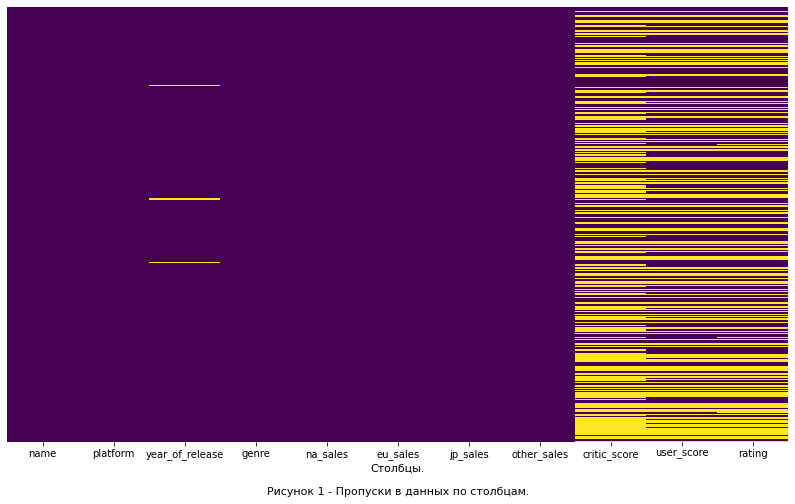

In [8]:
# Создаем область под график.
fig, ax = plt.subplots(figsize = (14, 8))
# Визуализируем пропуски.
sns_heatmap = sns.heatmap(df.isna(), 
                          yticklabels=False, 
                          cbar=False, 
                          cmap='viridis' ) 
plt.xlabel('Столбцы.\n\nРисунок 1 - Пропуски в данных по столбцам.', size=11)
plt.show() 

Желтым выделены пропущенные значения.  
По визуальной оценке, больше всего пропусков в столбцах, содержащих оценки критиков, пользователей и рейтинг ESRB. Еще есть небольшое количество пропусков в столбце "year_of_release" с данными выхода игр по годам.

Но небольшое количество пропусков может быть и в других столбцах.  
Посчитаем и выведем количество пропусков по столбцам. 

In [9]:
print(f'Количество пропущенных значений по столбцам:\n{df.isna().sum()}')

Количество пропущенных значений по столбцам:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


В столбце "name" всего 2 пропуска.

In [10]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В двух строках отсутствуют название игры, жанр и полностью отсутствуют данные о рейтинге. Еще у одной из них очень маленькое количество продаж. Эти данные можно удалить.

In [11]:
df.drop([659, 14244], axis=0, inplace=True)

In [12]:
print(f'Размер данных после удаления 2-х строк\nСтрок: {df.shape[0]}')

Размер данных после удаления 2-х строк
Строк: 16713


Столбец "year_of_release" содержит данные о том, в каком году произошел выпуск игры и должен быть в целочисленном формате "int64". Посмотрим на уникальные значения в столбце.

In [13]:
df['year_of_release'].sort_values(ascending=False).unique()

array([2016., 2015., 2014., 2013., 2012., 2011., 2010., 2009., 2008.,
       2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000., 1999.,
       1998., 1997., 1996., 1995., 1994., 1993., 1992., 1991., 1990.,
       1989., 1988., 1987., 1986., 1985., 1984., 1983., 1982., 1981.,
       1980.,   nan])

Отсутствующие данные о годе выпуска игры удалим. Приведем все данные в столбце к типу "int64".

In [14]:
df.dropna(subset=['year_of_release'], inplace=True)

In [15]:
df['year_of_release'] = df['year_of_release'].astype('int64')

In [16]:
df['year_of_release'].sort_values(ascending=False).unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984,
       1983, 1982, 1981, 1980], dtype=int64)

In [17]:
print(f'Количество строк после удаления пустых значений в столбце "year_of_release":')
df.shape[0]

Количество строк после удаления пустых значений в столбце "year_of_release":


16444

In [18]:
print('Уникальные значения в столбце "user_score"')
print(df['user_score'].unique())

Уникальные значения в столбце "user_score"
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Все строки 'tbd' заменим на nan, т.к. они не несут полезной информации. Переведем столбец "user_score" в тип "float64".

In [19]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float64')

В столбцах "critic_score" и "user_score" много пропусков. Оценим, как пропуски в этих столбцах зависят от платформы.

In [20]:
critic = df.groupby(['platform'])['critic_score'].count()
print(f'Распределение количества оценок критиков по типу платформ:\n{critic}')

Распределение количества оценок критиков по типу платформ:
platform
2600       0
3DO        0
3DS      166
DC        14
DS       708
GB         0
GBA      430
GC       437
GEN        0
GG         0
N64        0
NES        0
NG         0
PC       699
PCFX       0
PS       196
PS2     1275
PS3      804
PS4      252
PSP      456
PSV      119
SAT        0
SCD        0
SNES       0
TG16       0
WS         0
Wii      568
WiiU      90
X360     894
XB       706
XOne     169
Name: critic_score, dtype: int64


Можно отметить, что у большого количество платформ оценки критиков отсутствуют за весь период наблюдений с 1980 по 2016год включительно. 

Проверим, у каких платформ отсутствуют оценки критиков. Возможно, оценки и критиков , и пользователей отсутствуют у одинаковых платформ.

In [21]:
user = df.groupby(['platform'])['user_score'].count()
print(f'Распределение количества оценок пользователей по типу платформ:\n{user}')

Распределение количества оценок пользователей по типу платформ:
platform
2600       0
3DO        0
3DS      171
DC        14
DS       512
GB         0
GBA      251
GC       357
GEN        0
GG         0
N64        0
NES        0
NG         0
PC       755
PCFX       0
PS       159
PS2     1220
PS3      861
PS4      257
PSP      418
PSV      142
SAT        0
SCD        0
SNES       0
TG16       0
WS         0
Wii      548
WiiU     100
X360     945
XB       571
XOne     182
Name: user_score, dtype: int64


Похоже, что оценки в столбцах "critic_score" и "user_score" отсутствуют у одинаковых платформ. Сравним эти списки.

In [22]:
# В списке будут названия платформ, у которых нет оценок критиков.
platform_nan1 = critic[critic == 0].index.to_list()

In [23]:
# В списке будут названия платформ, у которых нет оценок пользователей.
platform_nan2 = user[user == 0].index.to_list()

In [24]:
if platform_nan1 == platform_nan2:
    print('Оценки критиков и пользователей отсутствуют у одинаковых платформ.')
else:
    print('Списки платформ с отсутствующими оценками не совпадают.')

Оценки критиков и пользователей отсутствуют у одинаковых платформ.


In [25]:
print('Список платформ, у которых отсутствуют оценки игр критиками и пользователями:\n')
print(*platform_nan1)

Список платформ, у которых отсутствуют оценки игр критиками и пользователями:

2600 3DO GB GEN GG N64 NES NG PCFX SAT SCD SNES TG16 WS


In [26]:
print(f'Количество платформ без оценок: {len(platform_nan1)}')

Количество платформ без оценок: 14


In [27]:
print(f'Список платформ с оценками:\n {critic[critic > 0].index.to_list()}')

Список платформ с оценками:
 ['3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


In [28]:
print(f'Количество платформ с оценками: {len(critic[critic > 0].index.to_list())}')

Количество платформ с оценками: 17


Посмотрим, на уникальные значения в столбце "rating".

In [29]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

#### Описание данных в столбце "rating"(рейтинг ESRB).
<pre><code>
«EC» («Early childhood»)         — «Для детей младшего возраста»
«E» («Everyone»)                 — «Для всех»
«E10+»(«Everyone 10 and older»)  — «Для всех старше 10 лет»
«T» («Teen»)                     — «Подросткам 13—19 лет»
«M» («Mature»)                   — «От 17 лет»
«AO» («Adults Only 18+»)         — «Только для взрослых»
«RP» («Rating Pending»)          — «Рейтинг ожидается»
«K-A» («for Kids to Adults»)     — «Для детей и взрослых» 

Заменим все отсутствующие значения на "RP" («Rating Pending») — «Рейтинг ожидается».

In [30]:
df.rating = df.rating.fillna('RP')

In [31]:
df.rating.unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

Создадим столбец "sum_sales" с суммарными продажами игр.

In [32]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


In [33]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
sum_sales             0
dtype: int64

Пропуски остались только в столбцах с оценками критиков и пользователей. Посмотрим на описательные статистики базы.

In [34]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,16444.00,16444.00,16444.00,16444.00,16444.00,7983.00,7463.00,16444.00
mean,2006.49,0.26,0.15,0.08,0.05,68.99,7.13,0.54
std,5.88,0.82,0.51,0.31,0.19,13.92,1.50,1.56
min,1980.00,0.00,0.00,0.00,0.00,13.00,0.00,0.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00,6.40,0.06
50%,2007.00,0.08,0.02,0.00,0.01,71.00,7.50,0.17
75%,2010.00,0.24,0.11,0.04,0.03,79.00,8.20,0.47
max,2016.00,41.36,28.96,10.22,10.57,98.00,9.70,82.54


Попробуем создать новую копию базы и заполнить пропуски в столбцах с оценками критиков медианными значениями. Отбор оценок будет делать по названию платформы .

In [35]:
df_new = df.copy()
df_new['critic_score'] = df_new.groupby(['platform'])\
['critic_score'].apply(lambda x: x.fillna(x.median()))
df_new.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1097
user_score         8981
rating                0
sum_sales             0
dtype: int64

Пропусков в столбце с оценками критиков стало значительно меньше.

Попробуем таким же образом заполнить пропуски в столбцах с оценками пользователей медианными значениями.

In [36]:
df_new['user_score'] = df_new.groupby(['platform'])\
['user_score'].apply(lambda x: x.fillna(x.median()))
df_new.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1097
user_score         1097
rating                0
sum_sales             0
dtype: int64

И в столбце с оценками пользователей стало значительно меньше пропусков.

Пропуски остались только в столбцах "critic_score" и "user_score". Попробуем создать выборку из датафрейма, в которой совсем не будет пропусков в этих столбцах.

In [37]:
df_new = df_new.dropna(axis=0, how='any')

In [38]:
df_new.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
sum_sales          0
dtype: int64

Пропусков в данных не осталось.

Определим, какой процент составляет размер выборки от размера датафрейма.

In [39]:
pr_new = round((df_new.size * 100) / df.size, 1)
print(f'Выборка составляет {pr_new}% от исходного датафрейма.')

Выборка составляет 93.3% от исходного датафрейма.


Так как выборка составила более 75% от исходного размера датафрейма, эта выборка репрезентативна. Можем дальше использовать эту выборку для анализа зависимости продаж игр от оценок критиков и пользователей.

Описательные статистики новой базы:

In [40]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,16444.00,16444.00,16444.00,16444.00,16444.00,7983.00,7463.00,16444.00
mean,2006.49,0.26,0.15,0.08,0.05,68.99,7.13,0.54
std,5.88,0.82,0.51,0.31,0.19,13.92,1.50,1.56
min,1980.00,0.00,0.00,0.00,0.00,13.00,0.00,0.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00,6.40,0.06
50%,2007.00,0.08,0.02,0.00,0.01,71.00,7.50,0.17
75%,2010.00,0.24,0.11,0.04,0.03,79.00,8.20,0.47
max,2016.00,41.36,28.96,10.22,10.57,98.00,9.70,82.54


В очищенной базе данные с 1980 года по 2016 год включительно.
Больше всего продаж игр приходится на Северную Америку. На втором месте Европа. Затем следует Япония и остальные страны.
Среднее суммарное значение продаж игр сильно отличается (больше), чем медианное значение. Скорее всего на него повлиял тот факт, что единица измерения продаж - миллионы. Поэтому, во многих строках стоит 0 продаж, хотя продажи игры были.

In [41]:
print(f'Размер очищенной базы\nСтрок: {df.shape[0]} Столбцов: {df.shape[1]}')

Размер очищенной базы
Строк: 16444 Столбцов: 12


In [42]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
sum_sales             0
dtype: int64

Исходный файл с данными был очищен и создан датафрейм с корректными данными, а так же выборка для анализа влияния оценок критиков и пользователей на продажи игр. В выборке пропуски в данных были заполнены медианными значениями оценок критиков или пользователей по соответсвующей игровой платформе с учетом года выпуска игры. В датафрейме остались пропуски только в столбцах с оценками пользователей и критиков.
<br>
<br>

### 2. <a name="2">Исследовательский анализ данных</a>
Основные задачи этапа:<br>
1. Определить, сколько игр выпускалось в разные годы.
- Определить, как менялись продажи по платформам. Определить платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Рассмотеть данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

2. Определить, какие платформы лидируют по продажам, растут или падают. Выберите несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Определить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.Соотнесите выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
<br>
<br>

#### Проведем анализ, сколько игр выпускалось в разные годы.  

In [43]:
years = df.groupby('year_of_release')['name'].count().sort_values(ascending=False)
print('Годы с самым большим количеством наименований выпущенных игр (топ 10).')
years.head(10)

Годы с самым большим количеством наименований выпущенных игр (топ 10).


year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: name, dtype: int64

In [44]:
#Загрузим отображение сетки на всех графиках.
sns.set_style('whitegrid')

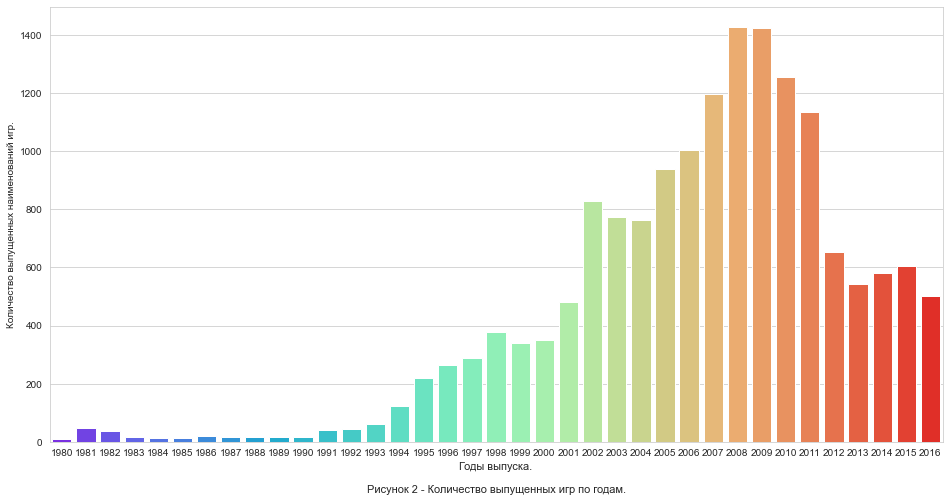

In [45]:
plt.figure(figsize=(16, 8))
sns.barplot(x=years.index, y=years.values, palette='rainbow')
plt.ylabel('Количество выпущенных наименований игр.')
plt.xlabel('Годы выпуска.\n\nРисунок 2 - Количество выпущенных игр по годам.', size=11)
plt.show()

Своего максимума выпуск игр достиг в 2008-2009 годах. Далее количество выпущенных на рынок игр каждый год снижалось. Периоды наибольшей активности: с 2002 по 2011 год включительно.
<br>
<br>

#### Проведем анализ, как по годам распределились продажи игр.

In [46]:
sales = df.groupby('year_of_release')['sum_sales'].sum().sort_values(ascending=False)
print('Годы с самым большим количеством проданных экземпляров игр (топ-10).')
sales.head(10)

Годы с самым большим количеством проданных экземпляров игр (топ-10).


year_of_release
2008    671.50
2009    658.82
2007    604.75
2010    590.13
2006    517.71
2011    507.58
2005    457.82
2004    418.68
2002    394.97
2013    361.24
Name: sum_sales, dtype: float64

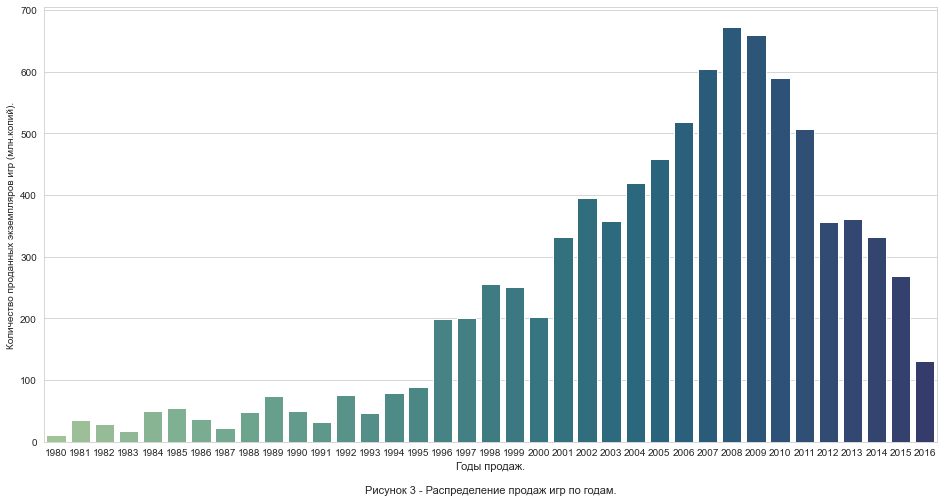

In [47]:
plt.figure(figsize=(16, 8))
sns.barplot(x=sales.index, 
            y=sales.values, 
            palette='crest')
plt.ylabel('Количество проданных экземпляров игр (млн.копий).')
plt.xlabel('Годы продаж.\n\nРисунок 3 - Распределение продаж игр по годам.', size=11)
plt.show()

Период максимальных продаж и в этом случае 2008 и 2009 годы.  
После 2011 года количество проданных экземпляров игр резко снизилось. Особенно заметно снижение в 2016 году.  
На предыдущем графике выпуск игр в 2013-2016 годах был на приблизительно одинаковом уровне, а продажи игр показывают спад в те же годы.

Рассмотрим платформы, на которых выпускались игры.

In [48]:
print('Топ-10 самых часто встречающихся платформ.')
platforms10 = df.platform.value_counts(ascending=False).head(10)
platforms10

Топ-10 самых часто встречающихся платформ.


PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
Name: platform, dtype: int64

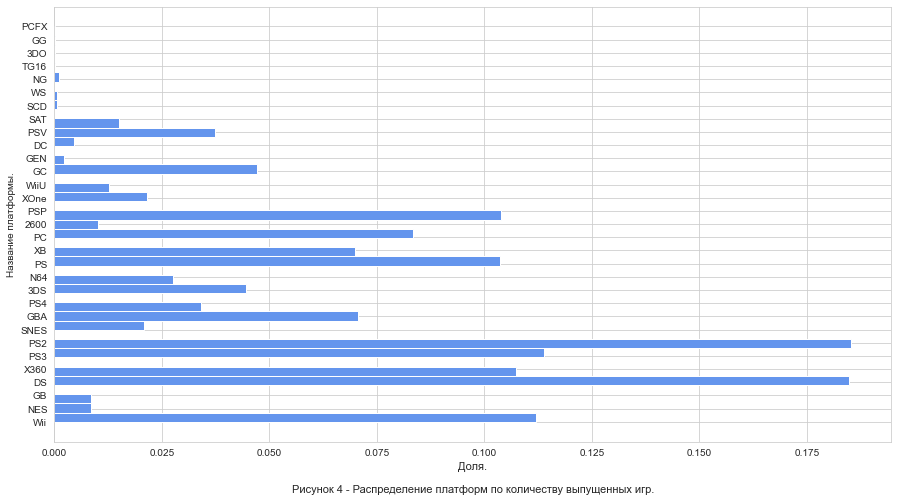

In [49]:
plt.figure(figsize=(15, 8))
plt.hist(df.platform, 
         bins='auto', 
         density=True, 
         orientation='horizontal', 
         color='cornflowerblue')
plt.xlabel('Доля.\n\nРисунок 4 - Распределение платформ по количеству выпущенных игр.', 
           size=11)
plt.ylabel('Название платформы.')
plt.show()

На гистограмме можно выделить двух лидеров: PS2 от "Sony PlayStation" и DS от "Nintendo".  
За лидерами следует группа из 5 платформ:  
1. PSP, PS, PS3 от "Sony PlayStation"  
2. X360 от "Microsoft Xbox"  
3. Wii от "Nintendo".  

#### Проведем анализ, как менялись продажи по платформам. 

Рассмотрим, как распределились продажи игр по Топ-10 игровым платформам.

In [50]:
# Создадим список с топ-10 платформ.
top_10 = platforms10.sort_values(ascending=False).index.to_list()
top_10

['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'GBA', 'XB']

Создадим выборку по 10 самым популярным платформам.

In [51]:
df10 = df[(df.platform.isin(top_10))]
df10.shape

(13026, 12)

In [52]:
print(f'Выборка по топ-10 игровых платформ составляет\
 {round((df10.size * 100) / df.size, 1)}% от исходного датафрейма.')

Выборка по топ-10 игровых платформ составляет 79.2% от исходного датафрейма.


Выборку по топ-10 игровых платформ можно будет использовать в дальнейшем для анализа, т.к. она составляет более 75% от исходного размера данных.

In [53]:
platform_sls = df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)
print('Топ-10 самых больших продаж игр по платформам.')
platform_sls.head(10)

Топ-10 самых больших продаж игр по платформам.


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: sum_sales, dtype: float64

Самые большие продажи игр опять у платформы PS2 от "Sony PlayStation".

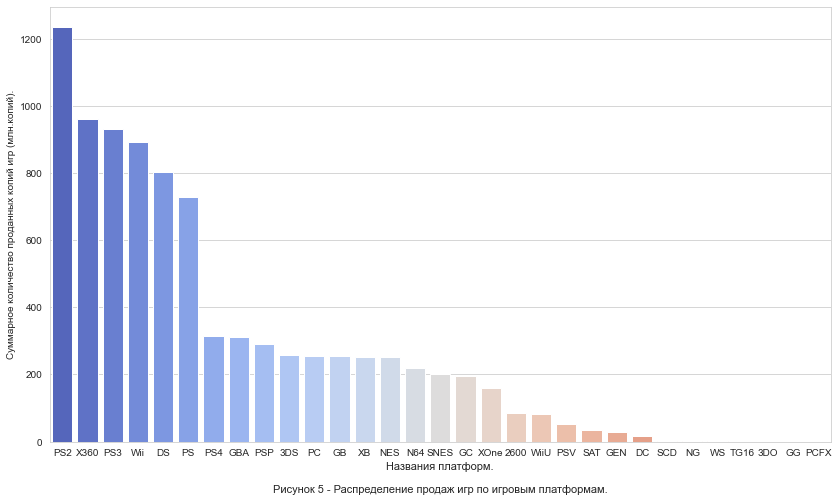

In [54]:
plt.figure(figsize=(14, 8))
sns.barplot(x=platform_sls.index, 
            y=platform_sls.values, 
            palette='coolwarm')
plt.ylabel('Суммарное количество проданных копий игр (млн.копий).')
plt.xlabel('Названия платформ.\n\nРисунок 5 - Распределение продаж игр по игровым платформам.', 
           size=11)
plt.show()

По продажам лидируют:

-PS2, PS3, PS от "Sony PlayStation"  
-X360 от "Microsoft Xbox"  
-Wii и DS от "Nintendo".

Самая прибыльная платформа - PS2. Она на первом месте на всех графиках: по количеству выпущенных игр, по количеству проданных копий игр.

In [55]:
platform_sls10 = df10.groupby('platform')['sum_sales'].sum().\
sort_values(ascending=False)
print('Самые большие суммарные продажи игр по топ-10 самых популярных платформ.')
platform_sls10.head(10)

Самые большие суммарные продажи игр по топ-10 самых популярных платформ.


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
GBA      312.88
PSP      289.53
PC       255.76
XB       251.57
Name: sum_sales, dtype: float64

Рассмотрим, как в процентном соотношении распределяются продажи игр среди топ-10 популярных игровых платформ.

In [56]:
# Цвета для обозначения игровых платформ на круговой диаграмме.
colors = ['royalblue',
          'cornflowerblue',
          'lightblue', 
          'mediumorchid', 
          'indianred', 
          'palevioletred', 
          'plum', 
          'pink', 
          'cadetblue', 
          'lemonchiffon']

Создадим список топ-10 по продажам популярных игровых платформ.

In [57]:
top_10_sls = platform_sls10.sort_values(ascending=False).index.to_list()
top_10_sls

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PC', 'XB']

Самые прибыльные платформы распределились следующий образом:

1.PSP, PS, PS3, PS2 от "Sony PlayStation"  

2.Wii, GBA, DS от "Nintendo" 

3.X360, XB от "Microsoft Xbox" 

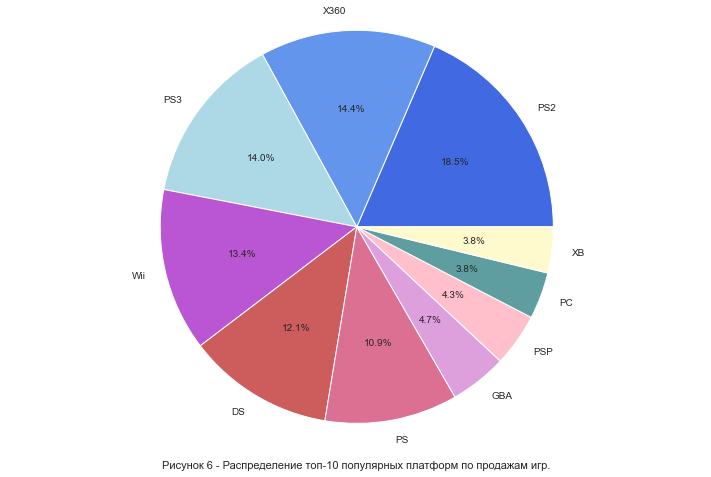

In [58]:
fig, ax = plt.subplots(figsize=(12.5, 8))
ax.pie(platform_sls10.values, 
       labels=platform_sls10.index, 
       autopct='%1.1f%%', 
       shadow=False, 
       rotatelabels=False,
       colors=colors)
ax.axis("equal")
plt.xlabel('\nРисунок 6 - Распределение топ-10 популярных платформ по продажам игр.', 
           size=11)
plt.show()

#### Проведем анализ, как по годам изменялись продажи игр по  топ-10 самых популярных игровых платформ.  Рассчитаем среднее время жизни игровой платформы.

In [59]:
# Создадим пустой список для записи времени жизни игровых платформ.
life_platforms = []

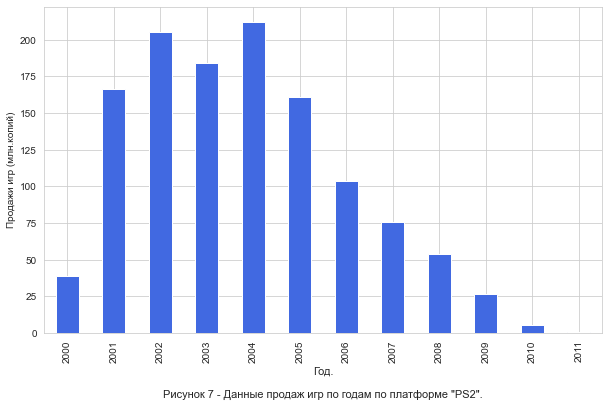

In [60]:
df[df.platform == top_10_sls[0]].groupby(['year_of_release'])\
['sum_sales'].sum().plot(kind='bar',figsize=(10, 6), color=colors[0])
plt.ylabel('Продажи игр (млн.копий)')
plt.xlabel(f'Год.\n\nРисунок 7 - Данные продаж игр по годам по платформе "{top_10_sls[0]}".', 
           size=11) 
plt.show()

In [61]:
ps2 = df[df.platform == top_10_sls[0]]['year_of_release'].max()\
- df[df.platform == top_10[0]]['year_of_release'].min()
life_platforms.append(ps2)
print(f'Игры на платформе {top_10_sls[0]} выходили {ps2} лет.')

Игры на платформе PS2 выходили 11 лет.


<br>
<br>
Платформа PS2 из топ-10 популярных игровых платформ вышла на рынок в 2000 году и игры на ней выпускались до 2011 года включительно. На платформу PS2 от "Sony PlayStation" пришлось больше всего продаж игр за весь период собранных данных с 1980 по 2016 год. Доля продаж PS2 составила 18,5%.  

Пик продаж пришелся на 2004 год.

<br>
<br>
<br>
<br>

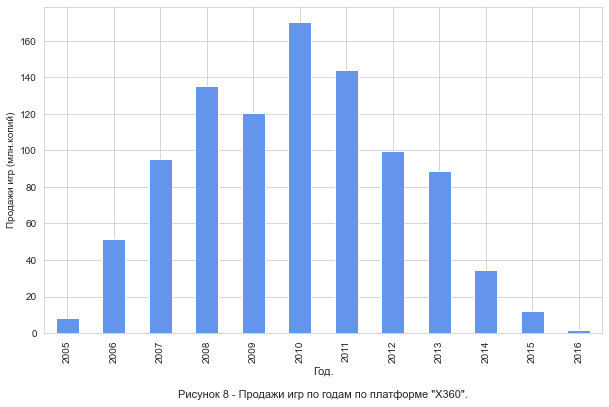

In [62]:
plt.figure(figsize=(12, 4))
df[df.platform == top_10_sls[1]].groupby(['year_of_release'])\
['sum_sales'].sum().plot(kind='bar',figsize=(10, 6), color=colors[1])
plt.ylabel('Продажи игр (млн.копий)')
plt.xlabel(f'Год.\n\nРисунок 8 - Продажи игр по годам по платформе "{top_10_sls[1]}".', 
           size=11) 
plt.show()

In [63]:
x360 = df[df.platform == top_10_sls[1]]['year_of_release'].max()\
- df[df.platform == top_10_sls[1]]['year_of_release'].min()
life_platforms.append(x360)
print(f'Игры на платформе {top_10_sls[1]} выходили {x360} лет.')

Игры на платформе X360 выходили 11 лет.


Платформа X360 из топ-10 популярных игровых платформ вышла на рынок в 2005 году и игры на ней выпускались до 2016 года включительно. Платформа X360 от "Microsoft Xbox" находится на втором месте по продажам игр за весь период собранных данных с 1980 по 2016 год. Доля продаж X360 составила 14,4%.  
Пик продаж пришелся на 2010 год.

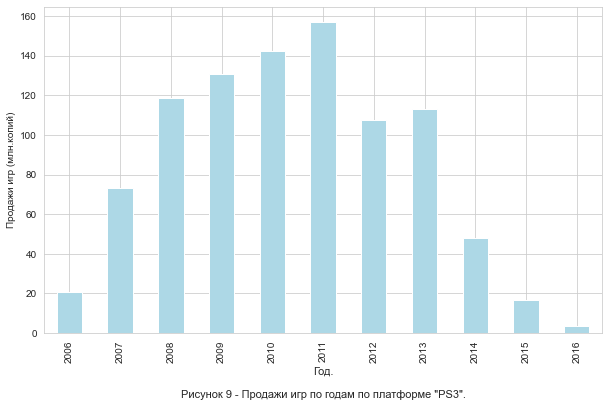

In [64]:
df[df.platform == top_10_sls[2]].groupby(['year_of_release'])\
['sum_sales'].sum().plot(kind='bar',figsize=(10, 6), color=colors[2])
plt.ylabel('Продажи игр (млн.копий)')
plt.xlabel(f'Год.\n\nРисунок 9 - Продажи игр по годам по платформе "{top_10_sls[2]}".', 
           size=11) 
plt.show()

In [65]:
ps3 = df[df.platform == top_10_sls[2]]['year_of_release'].max()\
- df[df.platform == top_10_sls[2]]['year_of_release'].min()
life_platforms.append(ps3)
print(f'Игры на платформе {top_10_sls[2]} выходили {ps3} лет.')

Игры на платформе PS3 выходили 10 лет.


Платформа PS3 из топ-10 популярных игровых платформ вышла на рынок в 2006 году и игры на ней выпускались до 2016 года включительно. Платформа PS3 от "Sony PlayStation" находится на третьем месте по продажам игр за весь период собранных данных с 1980 по 2016 год. Доля продаж PS3 составила 18,5%.  

Пик продаж пришелся на 2011 год, когда пик продаж игр на других платформах пошел на спад.

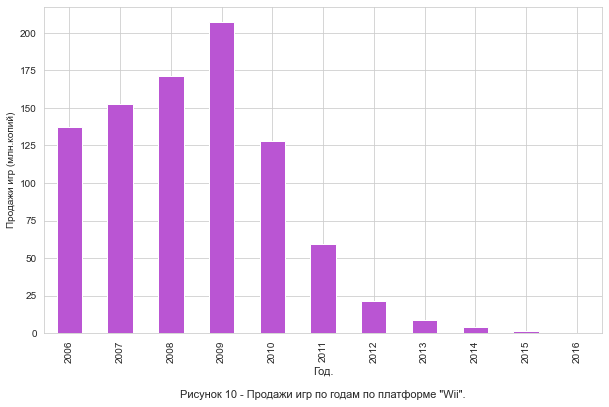

In [66]:
df[df.platform == top_10_sls[3]].groupby(['year_of_release'])\
['sum_sales'].sum().plot(kind='bar',figsize=(10, 6), color=colors[3])
plt.ylabel('Продажи игр (млн.копий)')
plt.xlabel(f'Год.\n\nРисунок 10 - Продажи игр по годам по платформе "{top_10_sls[3]}".', 
           size=11) 
plt.show()

In [67]:
wii = df[df.platform == top_10_sls[3]]['year_of_release'].max()\
- df[df.platform == top_10_sls[3]]['year_of_release'].min()
life_platforms.append(wii)
print(f'Игры на платформе {top_10_sls[3]} выходили {wii} лет.')

Игры на платформе Wii выходили 10 лет.


Платформа Wii из топ-10 популярных игровых платформ вышла на рынок в 2006 году и игры на ней выпускались до 2016 года включительно. Платформа Wii от "Nintendo" находится на четвертом месте по продажам игр за весь период собранных данных с 1980 по 2016 год. Доля продаж Wii составила 13,4%.  

Пик продаж пришелся на 2009 год, когда наблюдался общий пик продаж игр.

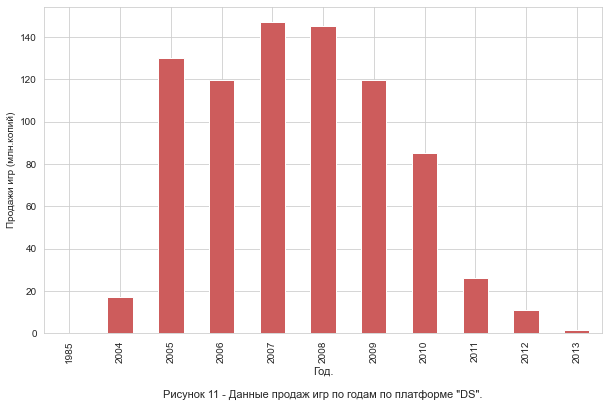

In [68]:
df[df.platform == top_10_sls[4]].groupby(['year_of_release'])\
['sum_sales'].sum().plot(kind='bar',figsize=(10, 6), color=colors[4])
plt.ylabel('Продажи игр (млн.копий)')
plt.xlabel(f'Год.\n\nРисунок 11 - Данные продаж игр по годам по платформе "{top_10_sls[4]}".', 
           size=11) 
plt.show()

In [69]:
ds = df[df.platform == top_10_sls[4]]['year_of_release'].max()\
- df[df.platform == top_10_sls[4]]['year_of_release'].min()
life_platforms.append(ds)
print(f'Игры на платформе {top_10_sls[4]} выходили {ds} лет.')

Игры на платформе DS выходили 28 лет.


Платформа DS из топ-10 популярных игровых платформ вышла на рынок в 1985 году, затем последовало затишье и игры на ней выпускались еще с 2004 до 2016 года включительно. Платформа DS от "Nintendo" находится на пятом месте по продажам игр за весь период собранных данных с 1980 по 2016 год. Доля продаж DS составила 12,1%.

Пик продаж пришелся на 2007 год, когда наблюдался общий пик продаж игр.

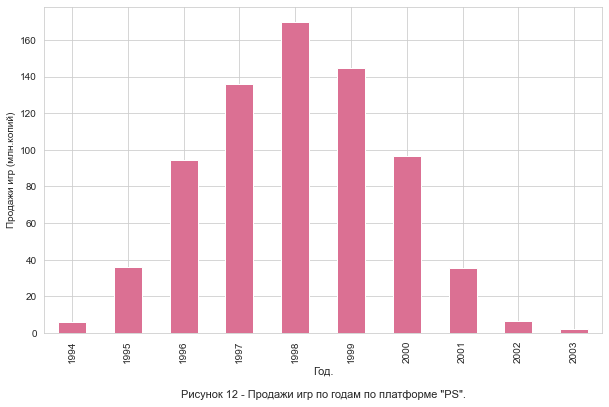

In [70]:
df[df.platform == top_10_sls[5]].groupby(['year_of_release'])\
['sum_sales'].sum().plot(kind='bar',figsize=(10, 6), color=colors[5])
plt.ylabel('Продажи игр (млн.копий)')
plt.xlabel(f'Год.\n\nРисунок 12 - Продажи игр по годам по платформе "{top_10_sls[5]}".', 
           size=11) 
plt.show()

In [71]:
ps = df[df.platform == top_10_sls[5]]['year_of_release'].max()\
- df[df.platform == top_10_sls[5]]['year_of_release'].min()
life_platforms.append(ps)
print(f'Игры на платформе {top_10_sls[5]} выходили {ps} лет.')

Игры на платформе PS выходили 9 лет.


Платформа PS из топ-10 популярных игровых платформ вышла на рынок в 1994 году и игры на ней выпускались до 2003 года включительно. Платформа PS от "Sony PlayStation" находится на шестом месте по продажам игр за весь период собранных данных с 1980 по 2016 год. Доля продаж PS составила 10,9%.

Пик продаж PS пришелся на 1998 год, когда пик продаж игр на других платформах еще не наблюдался.

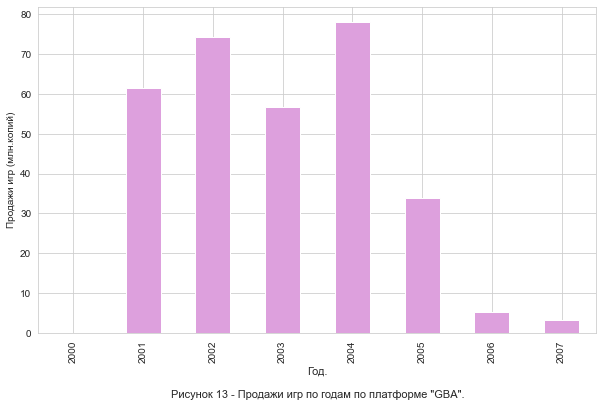

In [72]:
df[df.platform == top_10_sls[6]].groupby(['year_of_release'])\
['sum_sales'].sum().plot(kind='bar',figsize=(10, 6), color=colors[6])
plt.ylabel('Продажи игр (млн.копий)')
plt.xlabel(f'Год.\n\nРисунок 13 - Продажи игр по годам по платформе "{top_10_sls[6]}".', 
           size=11) 
plt.show()

In [73]:
gba = df[df.platform == top_10_sls[6]]['year_of_release'].max()\
- df[df.platform == top_10_sls[6]]['year_of_release'].min()
life_platforms.append(gba)
print(f'Игры на платформе {top_10_sls[6]} выходили {gba} лет.')

Игры на платформе GBA выходили 7 лет.


Платформа GBA из топ-10 популярных игровых платформ вышла на рынок в 2000 году и игры на ней выпускались до 2007 года включительно. Платформа GBA от "Nintendo" находится на седьмом месте по продажам игр за весь период собранных данных с 1980 по 2016 год. Доля продаж GBA составила 4,7%.

Пик продаж пришелся на 2004 год, когда еще не наблюдался общий пик продаж игр.

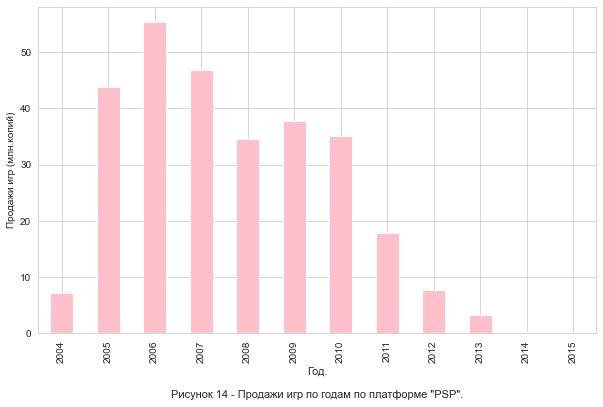

In [74]:
df[df.platform == top_10_sls[7]].groupby(['year_of_release'])\
['sum_sales'].sum().plot(kind='bar',figsize=(10, 6), color=colors[7])
plt.ylabel('Продажи игр (млн.копий)')
plt.xlabel(f'Год.\n\nРисунок 14 - Продажи игр по годам по платформе "{top_10_sls[7]}".', 
           size=11) 
plt.show()

In [75]:
psp = df[df.platform == top_10_sls[7]]['year_of_release'].max()\
- df[df.platform == top_10_sls[7]]['year_of_release'].min()
life_platforms.append(psp)
print(f'Игры на платформе {top_10_sls[7]} выходили {psp} лет.')

Игры на платформе PSP выходили 11 лет.


Платформа PSP из топ-10 популярных игровых платформ вышла на рынок в 2004 году и игры продавались до 2015 года включительно. Но продажи в 2014 и 2015 годах были уже маленькими. Платформа PSP от "Sony PlayStation" находится на восьмом месте по продажам игр за весь период собранных данных с 1980 по 2016 год. Доля продаж PSP составила 4,3%.

Пик продаж PSP пришелся на 2006 год.

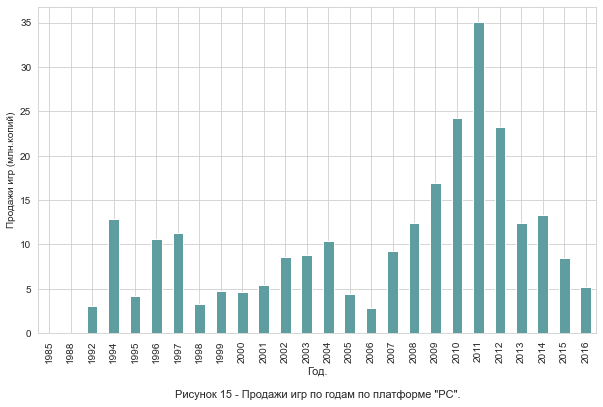

In [76]:
df[df.platform == top_10_sls[8]].groupby(['year_of_release'])\
['sum_sales'].sum().plot(kind='bar',figsize=(10, 6), color=colors[8])
plt.ylabel('Продажи игр (млн.копий)')
plt.xlabel(f'Год.\n\nРисунок 15 - Продажи игр по годам по платформе "{top_10_sls[8]}".', 
           size=11) 
plt.show()

In [77]:
pc = df[df.platform == top_10_sls[8]]['year_of_release'].max()\
- df[df.platform == top_10_sls[8]]['year_of_release'].min()
life_platforms.append(pc)
print(f'Игры на платформе {top_10_sls[8]} выходили {pc} год.')

Игры на платформе PC выходили 31 год.


Игры на РС (персональных компьютерах) вышли на рынок в 1985 году и продавались до 2016 года включительно. Игры на РС находятся на девятом месте по продажам игр за весь период собранных данных с 1980 по 2016 год и являются долгожителями среди остальных игровыъ платформ. Доля продаж РС составила 3,8%.

Пик продаж игр на РС пришелся на 2011 год, когда продажи игр на других платформах уже упали.

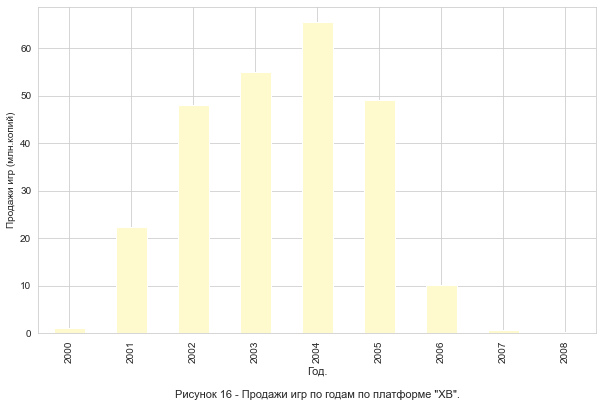

In [78]:
df[df.platform == top_10_sls[9]].groupby(['year_of_release'])\
['sum_sales'].sum().plot(kind='bar',figsize=(10, 6), color=colors[9])
plt.ylabel('Продажи игр (млн.копий)')
plt.xlabel(f'Год.\n\nРисунок 16 - Продажи игр по годам по платформе "{top_10_sls[9]}".', 
           size=11) 
plt.show()

In [79]:
xb = df[df.platform == top_10_sls[9]]['year_of_release'].max()\
- df[df.platform == top_10_sls[9]]['year_of_release'].min()
life_platforms.append(xb)
print(f'Игры на платформе {top_10_sls[9]} выходили {xb} лет.')

Игры на платформе XB выходили 8 лет.


Платформа XB из топ-10 популярных игровых платформ вышла на рынок в 2000 году и игры на ней продавались до 2008 года включительно. Платформа XB от "Microsoft Xbox" находится на десятом месте по продажам игр за весь период собранных данных с 1980 по 2016 год. Доля продаж XB составила 3,8%.

Пик продаж пришелся на 2004 год.

In [80]:
life_platforms = np.array(life_platforms)
print(f'Среднее время жизни игровой платформы: {np.mean(life_platforms)} лет.')
print(f'Медианное время жизни игровой платформы: {np.median(life_platforms)} лет.')

Среднее время жизни игровой платформы: 13.6 лет.
Медианное время жизни игровой платформы: 10.5 лет.


Если рассматривать только топ-10 самых популярных платформ за все время наблюдений, то среднее время жизни игровой платформы составляет 13,6 лет, а медианное время - 10,5 лет.

Рассчитаем время жизни по всем игровым платформам за период 1980-2016гг.

In [81]:
# Создадим датафрейм с данными по вышедшим играм по платформам и годам.
life = pd.crosstab(df['platform'], df['year_of_release'])

In [82]:
platforms = life.index.to_list() #Соберем названия платформ в список.

In [83]:
# Посчитаем среднее время жизни платформы с помощью цикла.
counter = 0
for el in platforms:
    li = life.loc[el].to_list()
    for j in li:
        if j > 0:
            counter += 1
counter1 = round(counter / len(platforms), 1)
print(f'Среднее время жизни игровой платформы в 1980-2016гг. составляло: {counter1} лет.')

Среднее время жизни игровой платформы в 1980-2016гг. составляло: 7.7 лет.


Популярные игровые платформы - "долгожители", поэтому, если рассчитать продолжительность жизни игровой платформы основываясь на данных по всем платформам, среднее время жизни игровой платформы будет ниже и состовит около 8 лет.

Возьмем среднее значение и будем считать, что время жизни игровой платформы 14 лет. Для того, чтобы в дальнейшем иметь возможность рассматривать данные за период времени с 2003 по 2016 год включительно, создадим выборку по годам.

In [84]:
df2016 = df[(df['year_of_release'] >= 2003) 
            & (df['year_of_release'] <= 2016) 
            & (df['sum_sales'] > 0)]

#### Проанализируем выборку за период 2003 - 2016 годы. 

In [85]:
v = round((df2016.size * 100) / df.size, 1)
print(f'Выборка за 2003-2016гг. составляет {v}% от исходного датафрейма.')

Выборка за 2003-2016гг. составляет 77.9% от исходного датафрейма.


In [86]:
sales2016 = df2016.groupby('year_of_release')['sum_sales'].\
sum().sort_values(ascending=False)
print(f'Количество проданных игр (млн.копий) за период 2003-2016гг.\n{sales2016}')

Количество проданных игр (млн.копий) за период 2003-2016гг.
year_of_release
2008    671.50
2009    658.82
2007    604.75
2010    590.13
2006    517.71
2011    507.58
2005    457.82
2004    418.68
2013    361.24
2003    357.54
2012    355.84
2014    331.53
2015    267.98
2016    129.94
Name: sum_sales, dtype: float64


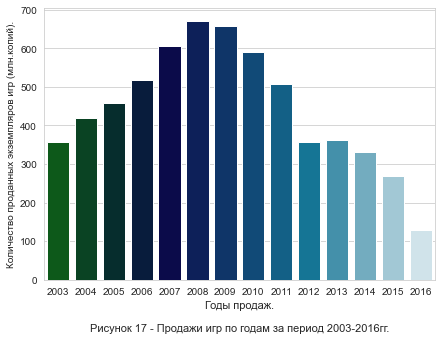

In [87]:
plt.figure(figsize=(7, 5))
sns.barplot(x=sales2016.index, y=sales2016.values, palette='ocean')
plt.ylabel('Количество проданных экземпляров игр (млн.копий).')
plt.xlabel('Годы продаж.\n\nРисунок 17 - Продажи игр по годам за период 2003-2016гг.', 
           size=11)
plt.show()

Данные по суммарным продажам игр за период 2003-2016гг.  приближенно нормально распределены.

In [88]:
platform_2016 = df2016.groupby('platform')['sum_sales'].\
sum().sort_values(ascending=True)
print(f'Количество проданных игр (млн.копий) за период 2003-2016гг.\n{platform_2016}')

Количество проданных игр (млн.копий) за период 2003-2016гг.
platform
DC        0.06
PS        2.07
PSV      53.81
WiiU     82.19
GC      118.58
XOne    159.32
GBA     177.12
XB      180.31
PC      187.02
3DS     257.81
PSP     289.53
PS4     314.14
DS      802.76
PS2     822.58
Wii     891.18
PS3     931.34
X360    961.24
Name: sum_sales, dtype: float64


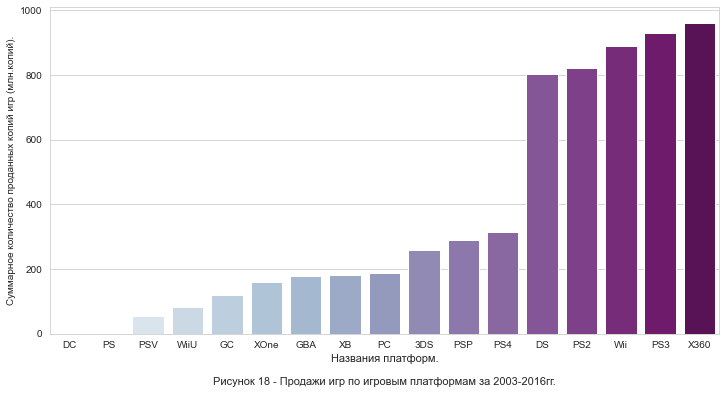

In [89]:
title = 'Продажи игр по игровым платформам за 2003-2016гг.'
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_2016.index, 
            y=platform_2016.values, 
            palette='BuPu')
plt.ylabel('Суммарное количество проданных копий игр (млн.копий).')
plt.xlabel(f'Названия платформ.\n\nРисунок 18 - {title}', 
           size=11)
plt.show()

<br>
За период 2003-2016гг. больше всего было продано игр на платормах Х360 от "Microsoft Xbox", PS2 и PS3 от "Sony PlayStation", Wii и DS от "Nintendo".

Из предыдущих результатов анализа ясно, что период жизни популярных, входящих в топ-10, платформ и менее известных отличается. Платформы могу выходить на рынок в разное время и внезапно исчезать с рынка.

Чтобы оценить, как распределился за период 2003-2016гг. по годам выпуск игр, и сколько игр было выпущено на каждой игровой платформе, построим таблицу распределения.

In [90]:
pd.crosstab(df2016['platform'], df2016['year_of_release'])

year_of_release,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,
3DS,0,0,0,0,0,0,0,0,116,93,91,80,86,46
DC,0,0,0,0,1,1,0,0,0,0,0,0,0,0
DS,0,23,118,201,376,492,403,323,153,23,8,0,0,0
GBA,150,175,135,39,6,0,0,0,0,0,0,0,0,0
GC,144,83,97,40,4,0,0,0,0,0,0,0,0,0
PC,33,30,37,52,62,76,107,90,139,61,38,47,50,54
PS,3,0,0,0,0,0,0,0,0,0,0,0,0,0
PS2,256,259,260,259,214,190,96,38,7,0,0,0,0,0
PS3,0,0,0,27,90,137,162,181,215,148,126,108,73,38


Среди новых лидеров в 2011-2016гг.:
- PS4, PSV от "Sony PlayStation"
- XOne от "Microsoft Xbox".  
- 3DS от "Nintendo".  
- PC (персональные компьютеры).

Меняются названия игровых платформ, но среди производителей тройка лидеров неизменна: "Sony PlayStation", "Nintendo", "Microsoft Xbox".  
Самые перспективные игровые платформы: PS4 от "Sony PlayStation", XOne от "Microsoft Xbox", 3DS от "Nintendo".

#### Построим «ящик с усами» по суммарным продажам игр в разбивке по платформам . 

Возьмем для этого топ-10 популярных платформ за 2003-2016гг.

In [91]:
platform_2016_top = platform_2016.sort_values(ascending=False).head(10).index

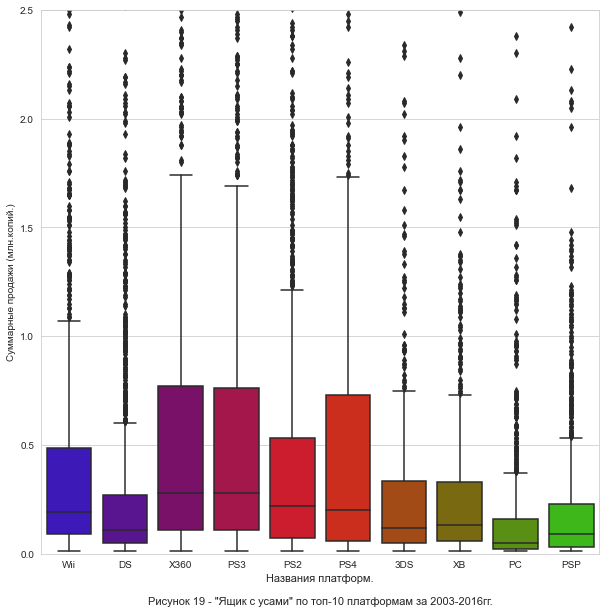

In [92]:
title0 = '"Ящик с усами" по топ-10 платформам за 2003-2016гг.'
plt.figure(figsize=(10, 10))
sns.boxplot(x='platform', y='sum_sales', 
            data=df2016[df2016.platform.isin(platform_2016_top)], 
            palette='brg')
plt.ylim(0, 2.5)
plt.xlabel(f'Названия платформ.\n\nРисунок 19 - {title0}', size=11)
plt.ylabel('Суммарные продажи (млн.копий.)')
plt.show()

График Boxplot по топ-10 игровых платформ был ограничен, чтобы рассмотреть, как продажи распределились по квартилям.  
Выделются платформы PS3 от "Sony PlayStation" и X360 от "Microsoft Xbox". У них самый высокий уровень медианных продаж. Это значит, что у половины всех выпущенных игр суммарные продажи выше, чем у других платформ. У PS3 и PS4 от "Sony PlayStation" и X360 от "Microsoft Xbox" третий квартиль находится выше, чем у остальных платформ. Третий квартиль показывает, что 75% суммарных продаж у них выше, чем у остальных платформ.

Boxplot'ы показывают, что продажи некоторого количества игр аномально высокие. У всех платформ наблюдаются многочисленные выбросы.

Медианные продажи у платформы PS4 ниже, чем у PS3 и X360. Это значит, что половина всех продаж по уровню успупает продажам на платформах PS3 и X360. Но все равно, платформа PS4 выглядит перспективной. Платформа PS4 новая, появилась в 2013 году, но у нее высокие медианные продажи.

И самый маленький уровень медианных продаж у игр на базе PC (персональные компьютеры). Положение игр на платформе РС - стабильно в конце топ-10 игровых платформ.

Для всех платформ наблюдаются многочисленные выбросы: это все значения, которые располагаются выше верхнего "уса" за пределами полутораквартильного расстояния от 3-го квартиля. Основную прибыль игровым платформам приносят единичные игры с аномально высокими продажами.

#### Проведем анализ, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Проанализируем за период 2003-2016гг. влияние оценок критиков и пользователей на популярную платформу из топ-10 Wii от "Nintendo".

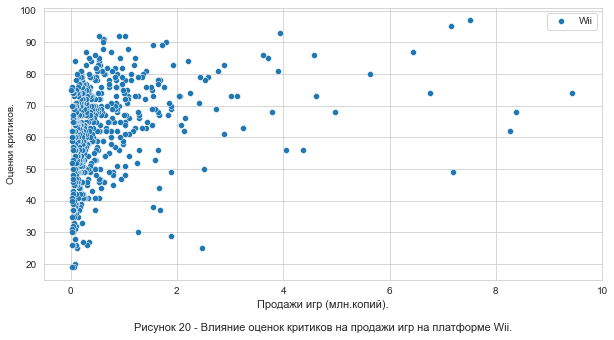

In [93]:
title1 = 'Влияние оценок критиков на продажи игр на платформе Wii.'
plt.figure(figsize=(10, 5))
sns.scatterplot(x='sum_sales', y='critic_score', 
                data=df2016[df2016.platform == 'Wii'], label='Wii')
plt.xlabel(f'Продажи игр (млн.копий).\n\nРисунок 20 - {title1}', size=11)
plt.ylabel('Оценки критиков.')
plt.xlim(-0.5, 10)
plt.show()

По диаграмме рассеивания прослеживается небольшая слабая зависимость между оценками критиков и суммарными продажами игр. Плотное расположение точек вдоль оси Y показывает, что у игр с разным уровнем оценки одинаковые размеры продаж. Но при уровне оценки критиков выше 70-80 у некоторого количества игр уровень продаж у увеличивается.

Рассмотрим влияние оценок пользователей на уровень продаж игр на платформе Wii.

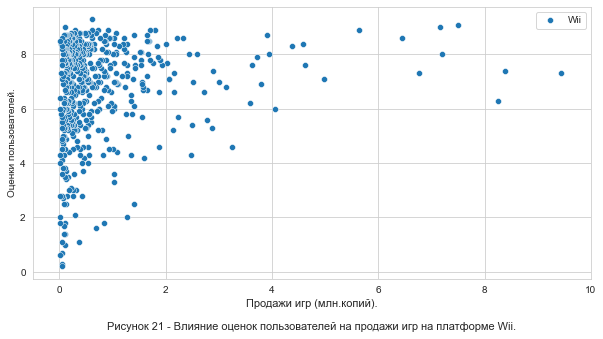

In [94]:
title2 = 'Влияние оценок пользователей на продажи игр на платформе Wii.'
plt.figure(figsize=(10, 5))
sns.scatterplot(x='sum_sales', y='user_score', 
                data=df2016[df2016.platform == 'Wii'], label='Wii')
plt.xlabel(f'Продажи игр (млн.копий).\n\nРисунок 21 - {title2}', size=11)
plt.ylabel('Оценки пользователей.')
plt.xlim(-0.5, 10)
plt.show()

В этом случае по диаграмме рассеивания не видно зависимости между оценками пользователей и суммарными продажами игр. Плотное расположение точек вдоль оси Y говорит, что у игр с разным уровнем оценки одинаковые размеры продаж. У игр с низкими оценками критиков наблюдаются высокие размеры продаж. У игр с одинаковыми оценками критиков уровень продаж в диапазоне от самого низкого до самого высокого.

На графиках не наблюдается признаков линейной зависимости между оценками и продажами. Поэтому, для рассчета коффициента регрессии используем метод Спирмена.

In [95]:
df2016[df2016.platform == 'Wii'][['critic_score', 'user_score','sum_sales']].\
corr(method='spearman')

,critic_score,user_score,sum_sales
critic_score,1.00,0.68,0.43
user_score,0.68,1.00,0.23
sum_sales,0.43,0.23,1.00


Коэффициенты корреляции показывают зависимость между оценками критиков и пользователей, а так же средний уровень зависимости между оценками критиков и суммарными продажами.  
Коэффициент корреляции 0,23 показывает очень слабую корреляцию между оценками пользователей и продажами.

Расмотрим зависимость суммарных продаж от оценок критиков и пользователей для всех платформ. 

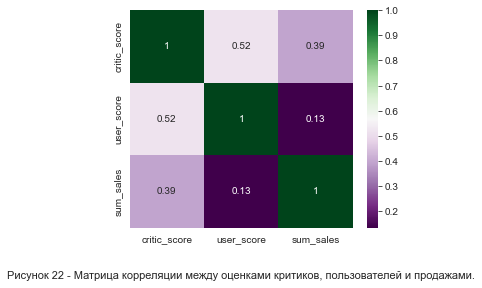

In [96]:
title4 = 'Матрица корреляции между оценками критиков, пользователей и продажами.'
fig, ax = plt.subplots(figsize = (5, 4)) # Создаем область под график.
sns.heatmap(df2016[['critic_score', 'user_score','sum_sales']].corr(method='spearman'), 
                          yticklabels=True, cbar=True, annot=True, cmap='PRGn')
plt.xlabel(f'\n\nРисунок 22 - {title4}', size=11)
plt.show()

<br>
<br>
Матрица корреляции по всем платформам показала коэффициент корреляции 0,39 между оценками критиков и суммарными продажами игр. Это средняя корреляция. Так же, корреляция есть между оценками критиков и пользователей.  
Корреляция между оценками пользователей и продажами игр в целом по всем платформам отсутствует.
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### Посмотрим на общее распределение игр по жанрам.

In [97]:
print('Распределение игр по жанрам, топ-5:')
genre = df2016.groupby('genre')['name'].count().sort_values(ascending=False)
genre.head()

Распределение игр по жанрам, топ-5:


genre
Action          2843
Sports          1613
Misc            1506
Role-Playing    1175
Adventure       1115
Name: name, dtype: int64

In [98]:
#Цвета для круговой диаграммы.
colmap = ['brown', 'indianred', 'tomato', 'lightsalmon', 'darkorange', 'lemonchiffon',
          'darkgoldenrod', 'olive', 'yellowgreen', 'green','mediumseagreen','lightgrey']

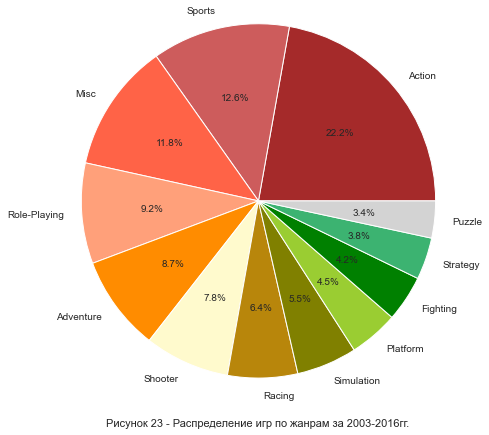

In [99]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(genre.values, labels=genre.index, 
       autopct='%1.1f%%', shadow=False, 
       rotatelabels=False, colors=colmap)
ax.axis("equal")
plt.xlabel('\n\nРисунок 23 - Распределение игр по жанрам за 2003-2016гг.', size=11)
plt.show()

<br>
<br>
<br>

#### Описание данных в столбце "genre" (игровые жанры).
<pre><code>
«Action»           — Экшен-игры.
«Sports»           — Спортивные игры.
«Misc»             — Игры, не вошедшие в остальные жанры.
«Role-Playing»     — Ролевые игры.
«Shooter»          — Шутеры.
«Adventure»        — Приключения.
«Racing»           — Гонки.
«Platform»         — Платформенные аркады.
«Simulation»       — Симуляторы.
«Fighting»         — Бои.
«Strategy»         — Стратегии.
«Puzzle»           — Головоломки.

Самая большая доля всех выпущенных на рынок игр приходится на экшен-игры. 

На втором месте - спортивные игры.

На третьем месте на диаграмме находятся игры с обозначением «Misc». Это сборный раздел для всех игр, которые невозможно было отнести к какому-либо другом. Поэтому, будем считать , что на третьем месте игры жанра «Role-Playing» - ролевые игры.

In [100]:
print('Распределение суммарных продаж по жанрам.')
genre_sls = df2016.groupby('genre')['sum_sales'].sum().sort_values(ascending=True)
genre_sls

Распределение суммарных продаж по жанрам.


genre
Strategy          93.49
Puzzle           121.10
Adventure        160.55
Fighting         248.62
Simulation       301.68
Platform         393.09
Racing           455.08
Role-Playing     635.02
Misc             670.78
Shooter          832.59
Sports           972.91
Action          1346.15
Name: sum_sales, dtype: float64

In [101]:
x = genre_sls.index
y = genre_sls.values

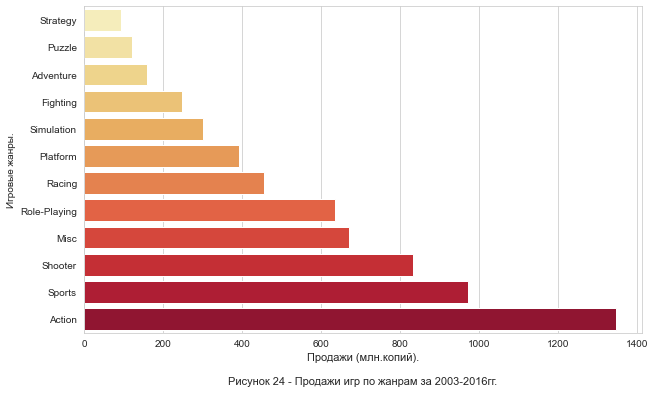

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x=y, y=x, palette='YlOrRd')
plt.ylabel('Игровые жанры.')
plt.xlabel('Продажи (млн.копий).\n\nРисунок 24 - Продажи игр по жанрам за 2003-2016гг.', 
           size=11)
plt.show()

За период 2003-2016гг. больше всего продаж приходилось на экшен-игры. На втором месте по продажам спортивные игры, на третьем - шутеры.  
Стратегии и головоломки продавались меньше всех остальных игровых жанров.

То есть, выпуск игр жанров «Action» и «Sports» поддерживается такими же высокими продажами. А продажи игр жанра «Shooter» опережают количество выпущенных игр.

Продажи остальных игр соответсявую доле выпуска этих игр.

### 3. <a name="3">Портрет пользователя.</a>
Основные задачи этапа:<br>
1. Составить портрет пользователя для каждого региона. Определить для пользователя каждого региона (NA, EU, JP):
- Cамые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Объяснить разницу.
- Определить влияние рейтинга ESRB на продажи в отдельном регионе.

#### Cамые популярные платформы (топ-5) по регионам.

In [103]:
na_pl = df2016.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
eu_pl = df2016.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
jp_pl = df2016.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

In [104]:
users_pl = df2016.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].\
sum().sort_values(by='na_sales', ascending=False).head(10)
users_pl

,na_sales,eu_sales,jp_sales
platform,,,
X360,595.74,268.32,12.30
Wii,486.87,258.32,68.28
PS3,390.13,327.21,79.41
PS2,380.81,204.35,89.03
DS,380.31,188.41,175.00
XB,130.66,43.01,0.52
PS4,108.74,141.09,15.96
PSP,107.27,65.62,75.88
GBA,104.81,41.53,26.89


In [105]:
print(f'Продажи (млн.копий) по всем платформам в Северной Америке: {na_pl.sum()}')
print(f'Продажи (млн.копий) по всем платформам в Европе: {eu_pl.sum()}')
print(f'Продажи (млн.копий) по всем платформам в Японии: {round(jp_pl.sum(), 2)}')

Продажи (млн.копий) по всем платформам в Северной Америке: 2233.86
Продажи (млн.копий) по всем платформам в Европе: 1246.61
Продажи (млн.копий) по всем платформам в Японии: 519.94


Среди регионов по количеству продаж лидирует Северная Америка. На втором месте Европа. На третьем - Япония.

Население Северной Америки на конец 2016 года составляло приблизительно 579 миллионов человек. В Европе в то же время насчитывалось  741 миллион человек населения. Но по продажам игр Северная Америка опережает Европу почти в 2 раза.

Население Японии составляло 127 миллионов человек. Это в несколько раз меньше населения в Европе или Северной Америке, но количество проданных игр составляет почти 50% от количество проданных игр в Европе.

Проанализируем, как по игровым платформам распределились продажи в регионах. Игры на каких игровых платформах продаются лучше.

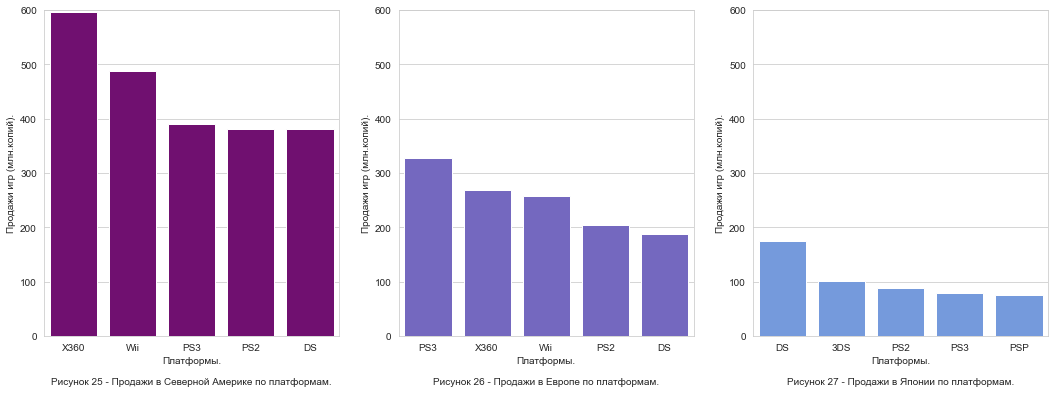

In [106]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131)
ax1 = sns.barplot(x=na_pl.index, y=na_pl.values, color='purple')
ax1 = plt.xlabel('Платформы.\n\nРисунок 25 - Продажи в Северной Америке по платформам.')
ax1 = plt.ylabel('Продажи игр (млн.копий).')
ax1 = plt.ylim(0, 600)

ax2 = fig.add_subplot(132)
ax2 = sns.barplot(x=eu_pl.index, y=eu_pl.values, color='slateblue')
ax2 = plt.xlabel('Платформы.\n\nРисунок 26 - Продажи в Европе по платформам.')
ax2 = plt.ylabel('Продажи игр (млн.копий).')
ax2 = plt.ylim(0, 600)

ax3 = fig.add_subplot(133)
ax3 = sns.barplot(x=jp_pl.index, y=jp_pl.values, color='cornflowerblue')
ax3 = plt.xlabel('Платформы.\n\nРисунок 27 - Продажи в Японии по платформам.')
ax3 = plt.ylabel('Продажи игр (млн.копий).')
ax3 = plt.ylim(0, 600)

plt.show()

На графиках видно, насколько похож список топ-5 платформ в Северной Америке и Европе и насколько этот список отличается от топ-5 платформ по продажам игр в Японии.

Проанализируем, как отличаются доли продажи игр по платформам в этих регионах.  

In [107]:
# Цвета для круговой диаграммы (рисунок 28).
colors_na = ['slateblue', 
             'mediumorchid', 
             'cornflowerblue', 
             'cadetblue', 
             'lightgrey']

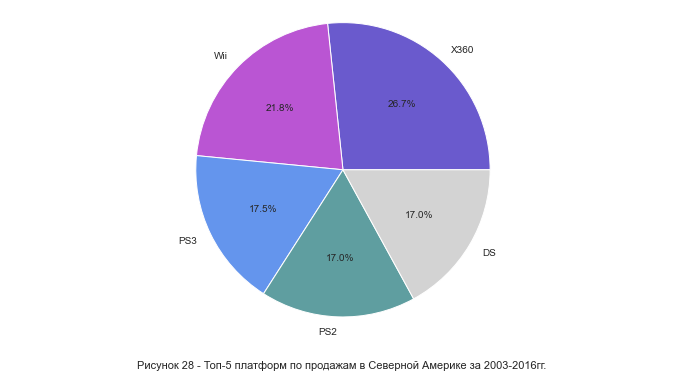

In [108]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(na_pl.values, labels=na_pl.index, 
       autopct='%1.1f%%', 
       shadow=False, 
       rotatelabels=False, 
       colors=colors_na)
ax.axis("equal")
plt.xlabel('\n\nРисунок 28 - Топ-5 платформ по продажам в Северной Америке за 2003-2016гг.', 
           size=11)
plt.show()

В Северной Америке самая популярная платформа X360 от "Microsoft Xbox".  
На втором месте - Wii.  
На третьем месте PS3 от "Sony PlayStation".  
Одинаковую долю на четвертом месте занимают PS2 от "Sony PlayStation" и платформа DS от "Nintendo".  

In [109]:
# Цвета для круговой диаграммы (рисунок 29).
colors_eu = ['cornflowerblue', 
             'slateblue', 
             'mediumorchid', 
             'cadetblue', 
             'lightgrey']

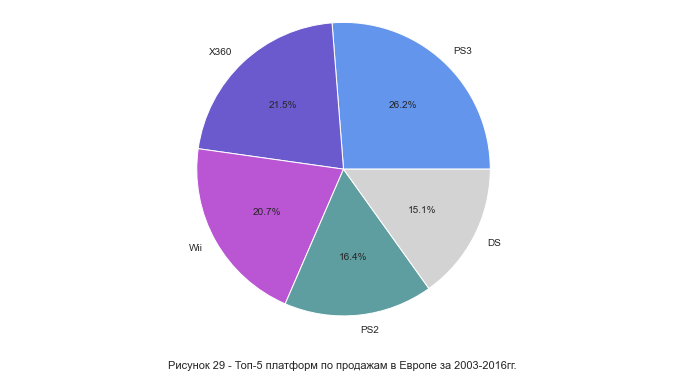

In [110]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(eu_pl.values, 
       labels=eu_pl.index, 
       autopct='%1.1f%%', 
       shadow=False, 
       rotatelabels=False, 
       colors=colors_eu)
ax.axis("equal")
plt.xlabel('\n\nРисунок 29 - Топ-5 платформ по продажам в Европе за 2003-2016гг.', 
           size=11)
plt.show()

В Европе самая популярная платформа PS3.  
Платформа Х360 - лидер рынка Северной Америки - на втором месте.  
На последнем месте платформа DS. Но в целом, список популярных платформ в Северной Америке и в Европе одинаковый, отличаются только доли рынка.
<br>
<br>

In [111]:
# Цвета для круговой диаграммы (рисунок 30).
colors_jp = ['lightgrey', 
             'plum', 
             'cadetblue', 
             'cornflowerblue', 
             'lightblue']

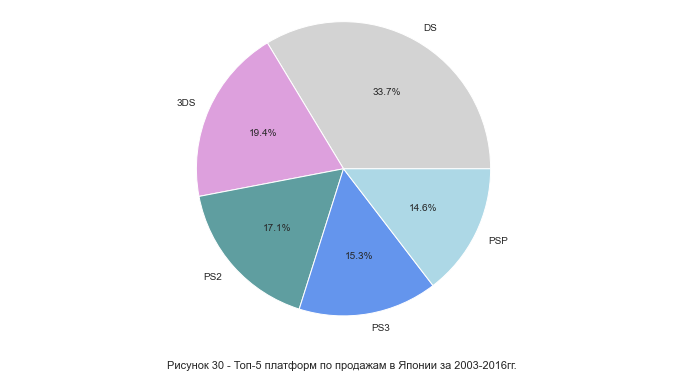

In [112]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(jp_pl.values, labels=jp_pl.index, autopct='%1.1f%%', shadow=False, 
       rotatelabels=False, colors=colors_jp)
ax.axis("equal")
plt.xlabel('\n\nРисунок 30 - Топ-5 платформ по продажам в Японии за 2003-2016гг.', 
           size=11)
plt.show()

В Японии картина совершенно иная. На первом месте по продажам игр платформа DS, которая на последнем, пятом месте в Северной Америке и Европе. DS от "Nintendo" занимает треть всего рынка.  
Платформы Wii и Х360, находящиеся в топ-5 по продажам в Северной Америке и Европе, в топ-5 Японии не входят.  
Еще в Японии в топ-5 входят платформы PSP и 3DS, не представленные в топ-5 в Европе и Северной Америке.

#### Самые популярные жанры (топ-5).

In [113]:
na_gr = df2016.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
eu_gr = df2016.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
jp_gr = df2016.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

In [114]:
users_genre = df2016.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].\
sum().sort_values(by='na_sales', ascending=False)

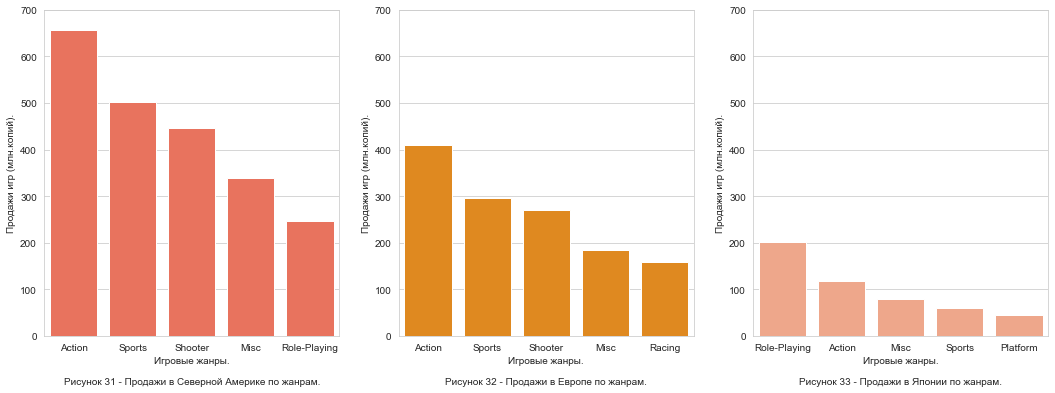

In [115]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131)
ax1 = sns.barplot(x=na_gr.index, y=na_gr.values, color='tomato')
ax1 = plt.xlabel('Игровые жанры.\n\nРисунок 31 - Продажи в Северной Америке по жанрам.')
ax1 = plt.ylabel('Продажи игр (млн.копий).')
ax1 = plt.ylim(0, 700)

ax2 = fig.add_subplot(132)
ax2 = sns.barplot(x=eu_gr.index, y=eu_gr.values, color='darkorange')
ax2 = plt.xlabel('Игровые жанры.\n\nРисунок 32 - Продажи в Европе по жанрам.')
ax2 = plt.ylabel('Продажи игр (млн.копий).')
ax2 = plt.ylim(0, 700)

ax3 = fig.add_subplot(133)
ax3 = sns.barplot(x=jp_gr.index, y=jp_gr.values, color='lightsalmon')
ax3 = plt.xlabel('Игровые жанры.\n\nРисунок 33 - Продажи в Японии по жанрам.')
ax3 = plt.ylabel('Продажи игр (млн.копий).')
ax3 = plt.ylim(0, 700)

plt.show()

Продажи игр по жанрам за 2003-2016гг. по регионам Северная Америка и Европа отличаются суммами продаж - продажи в Европе ниже. По жанрам почти полное совпадение, жанры «Action», «Sports» и «Shooter» лидируют. Только в Северной Америке на пятом месте жанр «Role-Playing» (ролевые игры), а в Европе - «Racing» (гонки).  
В Японии картина совсем иная. На первом месте по продажам - «Role-Playing» (ролевые игры). «Shooter» (шутеры), которые занимают третье место по продажам в Северной Америке и в Европе, в топ-5 Японии не вошли.  

Распределение игр по жанрам в целом показало больше сходства, чем различий. Во всех трех регионах популярны жанры «Action» и «Sports».
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### Проанализируем, как влияет рейтинг ESRB на продажи.

In [116]:
users_rat = df2016.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].\
sum().sort_values(by='na_sales', ascending=False)
users_rat

,na_sales,eu_sales,jp_sales
rating,,,
E,1044.93,587.51,166.18
M,669.38,438.86,50.88
T,590.91,325.01,107.15
RP,391.43,292.77,327.02
E10+,345.50,183.33,40.20
EC,1.53,0.11,0.00
AO,1.26,0.61,0.00


<pre><code>
«EC» («Early childhood»)         — «Для детей младшего возраста»
«E» («Everyone»)                 — «Для всех»
«E10+»(«Everyone 10 and older»)  — «Для всех старше 10 лет»
«T» («Teen»)                     — «Подросткам 13—19 лет»
«M» («Mature»)                   — «От 17 лет»
«AO» («Adults Only 18+»)         — «Только для взрослых»
«RP» («Rating Pending»)          — «Рейтинг ожидается»
«K-A» («for Kids to Adults»)     — «Для детей и взрослых» 

Как и в случае с распределением количества продаж копий игр по жанрам, распределение продаж по рейтингу ESRB в Северной америке и в Европе выгладит похоже. А в Японии - отличается.

В Японии выделяется количество проданных игр рейтингом «RP» (рейтинг ожидается). Этот рейтинг присваивается при выходе игры на рынок и затем должен изменится в соответствии с приведенной выше классификацией. Рейтинг ESRB - это американская рейтинговая модель. Возможно, это объясняет, почему большинство игр на Японском рынке не получает рейтинга.
<br>
<br>
<br>
<br>

In [117]:
na_rating = df2016.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_rating = df2016.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_rating = df2016.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

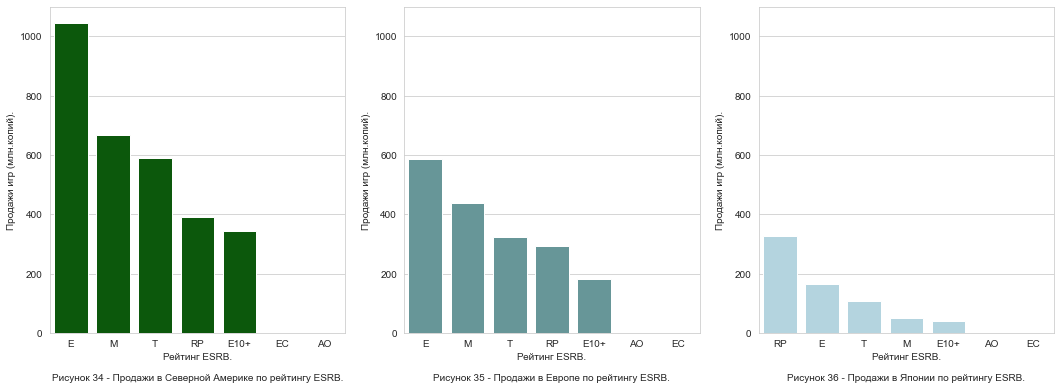

In [118]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131)
ax1 = sns.barplot(x=na_rating.index, y=na_rating.values, color='darkgreen')
ax1 = plt.xlabel('Рейтинг ESRB.\n\nРисунок 34 - Продажи в Северной Америке по рейтингу ESRB.')
ax1 = plt.ylabel('Продажи игр (млн.копий).')
ax1 = plt.ylim(0, 1100)

ax2 = fig.add_subplot(132)
ax2 = sns.barplot(x=eu_rating.index, y=eu_rating.values, color='cadetblue')
ax2 = plt.xlabel('Рейтинг ESRB.\n\nРисунок 35 - Продажи в Европе по рейтингу ESRB.')
ax2 = plt.ylabel('Продажи игр (млн.копий).')
ax2 = plt.ylim(0, 1100)

ax3 = fig.add_subplot(133)
ax3 = sns.barplot(x=jp_rating.index, y=jp_rating.values, color='lightblue')
ax3 = plt.xlabel('Рейтинг ESRB.\n\nРисунок 36 - Продажи в Японии по рейтингу ESRB.')
ax3 = plt.ylabel('Продажи игр (млн.копий).')
ax3 = plt.ylim(0, 1100)

plt.show()

- В Северной Америке больше все продаж приходится на рейтинг «E» (для всех возрастов). На втором месте с большим отставанием - «M» (от 17 лет), этот тип игр содержит сцены насилия, грубую лексику. На третьем месте - «T» (для подростков 13—19 лет). Рейтинг «RP» не учитываем, т.к. это означает отсутствие рейтинга.  
- В Европе картина совпадает с распределением продаж по рейтингу ESRB. Отличие только в уровне продаж, в Европе уровень продаж ниже. И меньше разница в уровне продаж между рейтингом «E» и рейтингом «M».
- В Японии трудно оценить зависимость сумм продаж от рейтинга ESRB, т.к. больше всего игр продано с рейтингом «RP» (рейтинг ожидается). Поэтому, невозможно узнать рейтинг игр большинства продаж.  

В целом, больше всего продают игр с рейтингом «E» (для всех возрастов).

### 4. <a name="4">Проверка гипотез</a>

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задать самостоятельно пороговое значение alpha.<br>
Пояснить:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

#### Проверка гипотезы о совпадении средних пользовательских рейтингов  платформ Xbox One и PC.

Нулевая гипотеза  
Н0:  Средние пользовательские рейтинги платформ Xbox One и PC совпадают.
                   
Альтернативная гипотеза  
Н1:  Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Данные возьмем за 2003-2016гг. Примем, что достоверность результатов теста составляет 95% и зададим пороговое значение:

In [119]:
alpha = 0.05

Создадим две выборки:  
1. по платформе "XOne" и оценкам пользователей;  
2. по играм на платформе PC и оценкам пользователей.

Выборки возьмем из датасета, в котором заполнены все данные по оценкам критиков и пользователей.

In [120]:
xone = df2016[(df2016.platform == 'XOne') & (df2016['user_score'] > 0)]['user_score']
pc = df2016[(df2016.platform == 'PC') & (df2016['user_score'] > 0)]['user_score']

Проверим, равны ли дисперсии двух выборок.

In [121]:
if round(np.var(xone), 2) == round(np.var(pc), 2):
    print('Дисперсии двух выборок равны.')
else:
    print('Дисперсии двух выборок не равны.')

Дисперсии двух выборок не равны.


Так как дисперсии двух выборок не равны, параметр equal_var принимает значение False.

In [122]:
equal_var = False

Оценим графики плотности распределения по обеим выборкам.

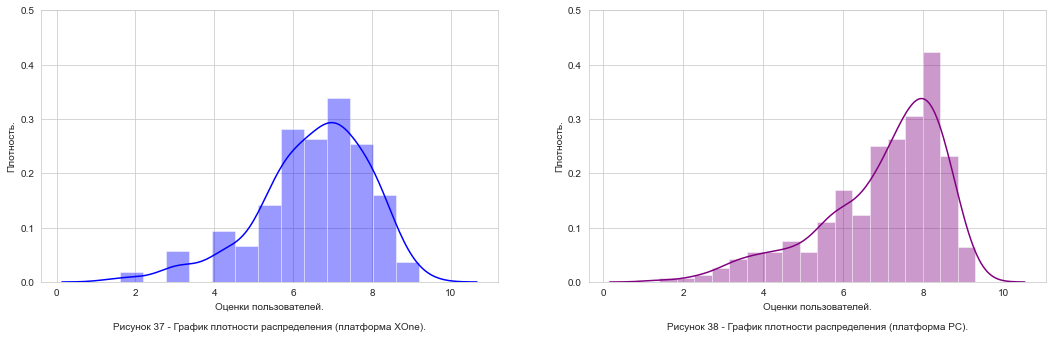

In [123]:
title5 = 'График плотности распределения (платформа XOne).'
title6 = 'График плотности распределения (платформа PC).'

fig = plt.figure(figsize=(18, 5))

ax1 = fig.add_subplot(121)
ax1 = sns.distplot(xone, color='blue')
ax1 = plt.xlabel(f'Оценки пользователей.\n\nРисунок 37 - {title5}', size=10)
ax1 = plt.ylabel('Плотность.')
ax1 = plt.ylim(0, 0.5)

ax2 = fig.add_subplot(122)
ax2 = sns.distplot(pc, color='purple')
ax2 = plt.xlabel(f'Оценки пользователей.\n\nРисунок 38 - {title6}', size=10)
ax2 = plt.ylabel('Плотность.')
ax2 = plt.ylim(0, 0.5)

plt.show()

На обоих графиках смещенное нормальное распределение. Будем использовать t-критерий Стьюдента.

In [124]:
res = st.ttest_ind(xone, pc, equal_var=equal_var)
print(f'p-значение равно: {round(res.pvalue, 5)}')

if (res.pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
    print('Средние пользовательские рейтинги платформ Xbox One и PC отличаются.')
else:
    print("Не получилось отвергнуть нулевую гипотезу.")
    print('Средние пользовательские рейтинги платформ Xbox One и PC совпадают.')

p-значение равно: 0.00014
Отвергаем нулевую гипотезу.
Средние пользовательские рейтинги платформ Xbox One и PC отличаются.


Мы сравнивали две выборки с пользовательскими оценками чтобы оценить, можно ли считать, что в генеральной совокупности средние пользовательских рейтингов игровых платформ Xbox One и PC равны. На основании полученных результатов нулевая гипотеза была отвергнута и принята альтернативная гипотеза о различии средних пользовательских рейтингов игровых платформ Xbox One и PC.

<br>
<br>

#### Проверка гипотезы о различии средних пользовательских рейтингов жанров «Action» и «Sports».

Нулевая гипотеза        
Н0:  Средние пользовательские рейтинги жанров «Action» и «Sports» совпадают. 

Альтернативная гипотеза  
Н1:  Средние пользовательские рейтинги жанров «Action» и «Sports» различаются.

Данные возьмем за 2003-2016гг. Примем, что достоверность результатов теста составляет 95% и зададим пороговое значение:

In [125]:
alpha = 0.05

Создадим две выборки:

1. по играм жанра «Action» и оценкам пользователей;
2. по играм жанра «Sports» и оценкам пользователей.

Выборки возьмем из датасета, в котором заполнены все данные по оценкам критиков и пользователей.

In [126]:
action = df2016[(df2016.genre == 'Action') & (df2016['user_score'] > 0)]['user_score']
sports = df2016[(df2016.genre == 'Sports') & (df2016['user_score'] > 0)]['user_score']

Проверим, равны ли дисперсии двух выборок.

In [127]:
if round(np.var(action), 2) == round(np.var(sports), 2):
    print('Дисперсии двух выборок равны.')
else:
    print('Дисперсии двух выборок не равны.')

Дисперсии двух выборок не равны.


Так как дисперсии двух выборок не равны, параметр equal_var принимает значение False.

In [128]:
equal_var = False

Оценим графики плотности распределения по обеим выборкам.

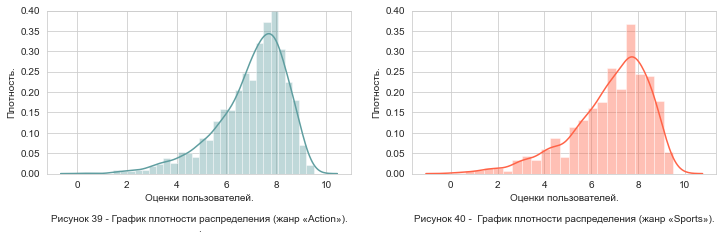

In [129]:
title7 = 'График плотности распределения (жанр «Action»).'
title8 = 'График плотности распределения (жанр «Sports»).'

fig = plt.figure(figsize=(12, 3))

ax1 = plt.subplot(121)
ax1 = sns.distplot(action, color='cadetblue')
ax1 = plt.xlabel(f'Оценки пользователей.\n\nРисунок 39 - {title7}\n.', size=10)
ax1 = plt.ylabel('Плотность.')
ax1 = plt.ylim(0, 0.4)

ax2 = plt.subplot(122)
ax2 = sns.distplot(sports, color='tomato')
ax2 = plt.xlabel(f'Оценки пользователей.\n\nРисунок 40 -  {title8}', size=10)
ax2 = plt.ylabel('Плотность.')
ax2 = plt.ylim(0, 0.4)

plt.show()

На обоих графиках смещенное нормальное распределение. Будем использовать t-критерий Стьюдента.

In [130]:
res = st.ttest_ind(action, sports, equal_var=equal_var)
print(f'p-значение равно: {round(res.pvalue, 5)}')

if (res.pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
    print('Средние пользовательские рейтинги жанров «Action» и «Sports» отличаются.')
else:
    print("Не получилось отвергнуть нулевую гипотезу.")
    print('Средние пользовательские рейтинги жанров «Action» и «Sports» совпадают.')

p-значение равно: 0.00203
Отвергаем нулевую гипотезу.
Средние пользовательские рейтинги жанров «Action» и «Sports» отличаются.


Мы сравнивали две выборки с пользовательскими оценками чтобы оценить, можно ли считать, что в генеральной совокупности средние пользовательские рейтинги жанров «Action» и «Sports» отличаются. В данном случае р-значение намного меньше уровня значимости 0,05 и это позволяет нам отвергнуть нулевую гипотезу.  
Если судить по графикам плотности распределения, можно предположить, что в генеральной совокупности средние пользовательские рейтинги жанров «Action» и «Sports» действительно не равны.

### 5. <a name="6">Выводы</a>

В исследовании были изучены данные с 1980 года по 2016 год включительно для изучения закономерностей на рынке игр. Данные были изучены за весь период, но особое внимание было уделено периоду с 2003 по 2016гг. включительно. Период был выбран исходя из средней продолжительности жизни игровых платформ. Необходимо было проанализировать наиболее актуальные данные, которые позволили бы сделать прогноз на ближайшее время. И еще этот период можно считать временем расцвета игр на игровых платформах и PC (персональных компьютерах). 

Анализ показал, что наиболее перспективными являются игровые платформы от следующих производителей:
- "Microsoft Xbox"  
- "Sony PlayStation"  
- "Nintendo".  

За годы названия платформ менялись, но неизменно в топ-5 оказывались платформы от этих производителей.  
В 2011-2016гг. на рынке появились новые платформы от этих производителей:  
- PS4, PSV от "Sony PlayStation"  
- XOne от "Microsoft Xbox"  
- 3DS от "Nintendo"
и они опять показали тенденцию к вхождению в топ-5 популярных платформ.

Рассмотренные данные о количестве проданных копий самых крупных регионах: в Северной Америке, Европе и Японии показали, что доли рынка могут кардинально отличаться в этих регионах, но платформы вышеуказанных производителей всегда остаются самыми популярными.

Анализ данных о распределении рынка игр по жанрам показал яркое отличие продаж в Северной Америке и Европе от Японии. В Северной Америке и Европе самые популярные жарны игр «Action» (экшен-игры), «Sports» (спортивные игры) и «Shooter» (шутеры). В то время как в Японии на первом месте «Role-Playing» (ролевые игры), а «Action»  и «Sports» на втором и третьем месте соответственно. Популярные на американском и европейском рынке игр шутеры вообще не вошли в топ-5 популярных жанров в Японии. При дальнейшем планировании необходим учитывать эту особенность. Игровой рынок в Японии кардинально отличается.

Сравнение распределения продаж игр по рейтингу ESRB показало, что скорее всего, больше всего покупают игр с рейтингом «E» (для всех возрастов). На втором месте с большим отставанием - «M» (от 17 лет), этот тип игр содержит сцены насилия, грубую лексику. На третьем месте - «T» (для подростков 13—19 лет). К сожалению, на рынке игр Японии больше всего оказалось игр с рейтингом «RP»,  что означает "рейтинг ожидается". Но на втором, третьем и четвертом местах игры с рейтингами «E», «T» и «M». Можем предположить, что в целом распределение продаж игр по всем регионам приблизительно совпадает.

Прогнозировать продажи игр в будущем можно ориентируясь по оценкам критиков, но с осторожностью. Коэффициент корреляции 0,39 между оценками критиков и продажами игр показывает скорее слабую корреляцию. Корреляции между продажами игр и оценками пользователей нет.

Статистическая проверка гипотез подтвердила, что пользовательские рейтинги платформ Xbox One и PC различаются. Платформа Xbox One от "Microsoft Xbox" появилась только в 2013 году. А игры на РС выходили начиная с 1985 года. Поэтому, у платформ должны быть разные средние пользовательские рейтинги.  
Статистическая проверка гипотез подтвердила, что средние пользовательские рейтинги жанров «Action» и «Sports» различаются. Это подтверждает и количество продаж игр в жанре «Action» в целом в мире и по регионам, которое значительно выше, чем у жанра «Sports».

Пик продаж игр пришелся на 2008-2009 годы и позже медленно падал. Для лучшей оценки перспектив продаж игр, следует дополнить данные результатами исследований развития игр на смартфонах , планшетах и онлайн-игр. Тогда можно будет в полной мере оценить перспективы рекламных кампаний и направление развития рынка игр.